## Data Mining Task 3, Part A: Classification

Dataset: Preprocessed Iris dataset (from Task 1)
Models: Decision Tree and KNN (k=5)
Evaluation: Accuracy, Precision, Recall, F1-score

### Load and Preprocess
We know it's already been preprocessed in task 1, but we are doing it again to confirm.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 8)
sns.set_style("whitegrid")

# Set seed for reproducibility
np.random.seed(42)

# ==================== 1. LOAD & PREPROCESS (Same as Task 1) ====================
print("🚀 Loading and preprocessing Iris dataset...")

# Load data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Data ready. Train: {len(X_train)}, Test: {len(X_test)}")

🚀 Loading and preprocessing Iris dataset...
✅ Data ready. Train: 120, Test: 30


### Decision Tree Classifier


🌳 Training Decision Tree classifier...
✅ Decision Tree Results:
   Accuracy:  0.967
   Precision: 0.970
   Recall:    0.967
   F1-Score:  0.967

Detailed Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



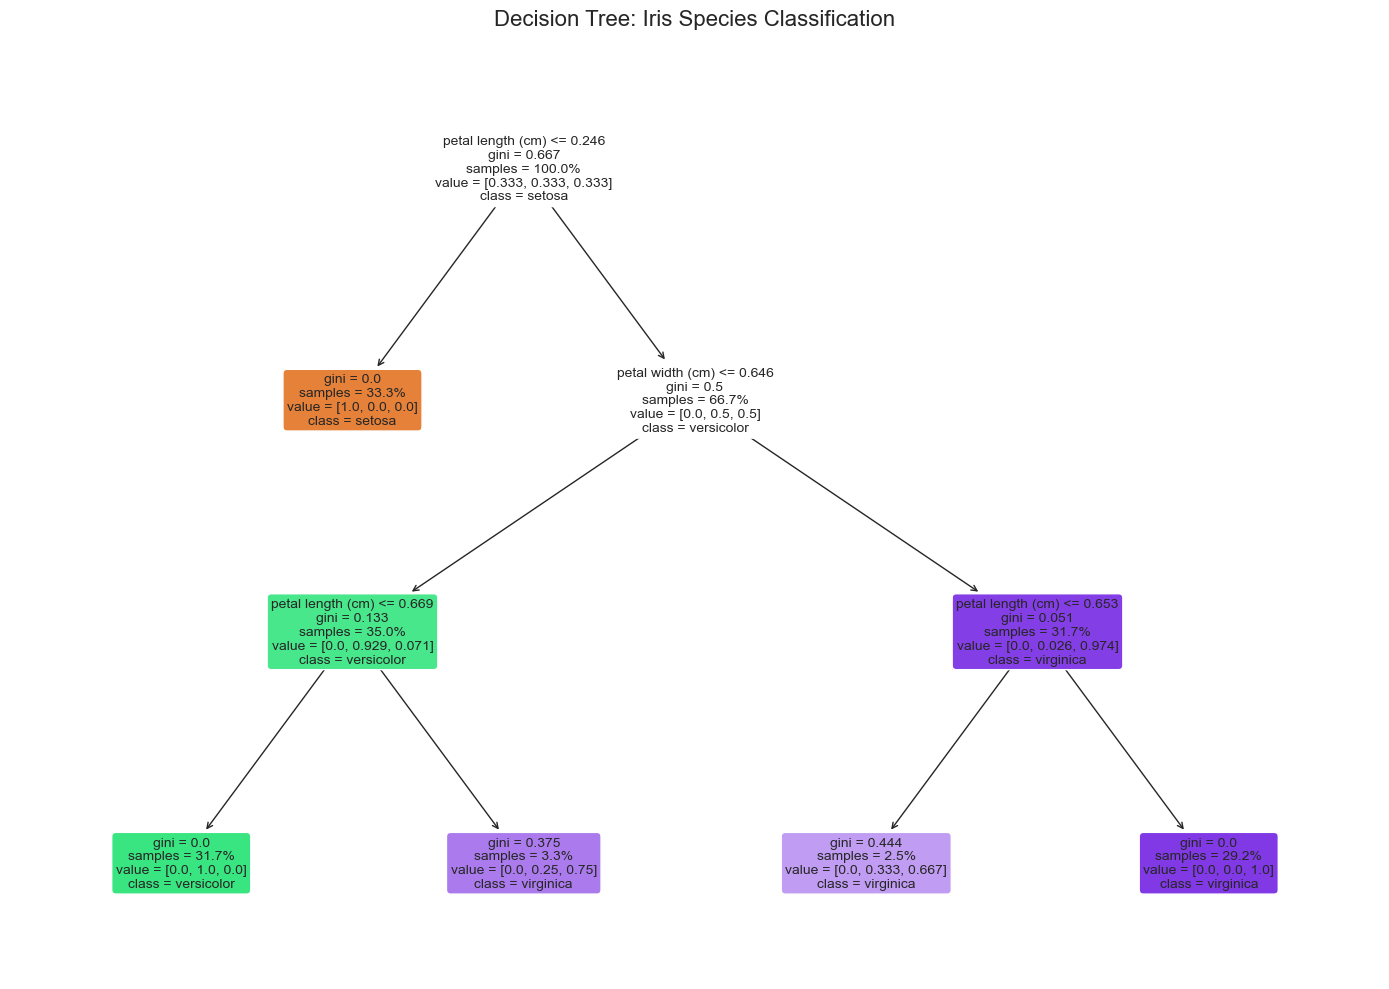

In [4]:
# ==================== 2. DECISION TREE CLASSIFIER ====================
print("\n🌳 Training Decision Tree classifier...")

# Train model
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted')
rec_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("✅ Decision Tree Results:")
print(f"   Accuracy:  {acc_dt:.3f}")
print(f"   Precision: {prec_dt:.3f}")
print(f"   Recall:    {rec_dt:.3f}")
print(f"   F1-Score:  {f1_dt:.3f}")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred_dt, target_names=class_names))

# Visualize tree
plt.figure(figsize=(14, 10))
plot_tree(dt, feature_names=feature_names, class_names=class_names,
          filled=True, rounded=True, fontsize=10, proportion=True)
plt.title("Decision Tree: Iris Species Classification", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()

### KNN Classifier

In [6]:
# ==================== 3. KNN CLASSIFIER (k=5) ====================
print("\n🔍 Training KNN classifier (k=5)...")

# Train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, average='weighted')
rec_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("✅ KNN (k=5) Results:")
print(f"   Accuracy:  {acc_knn:.3f}")
print(f"   Precision: {prec_knn:.3f}")
print(f"   Recall:    {rec_knn:.3f}")
print(f"   F1-Score:  {f1_knn:.3f}")


🔍 Training KNN classifier (k=5)...
✅ KNN (k=5) Results:
   Accuracy:  0.967
   Precision: 0.970
   Recall:    0.967
   F1-Score:  0.967


### Model Comparison


📊 Model Comparison:
        Model  Accuracy  Precision   Recall  F1-Score
Decision Tree  0.966667   0.969697 0.966667  0.966583
    KNN (k=5)  0.966667   0.969697 0.966667  0.966583

🏆 Best Model: Decision Tree (based on F1-score)


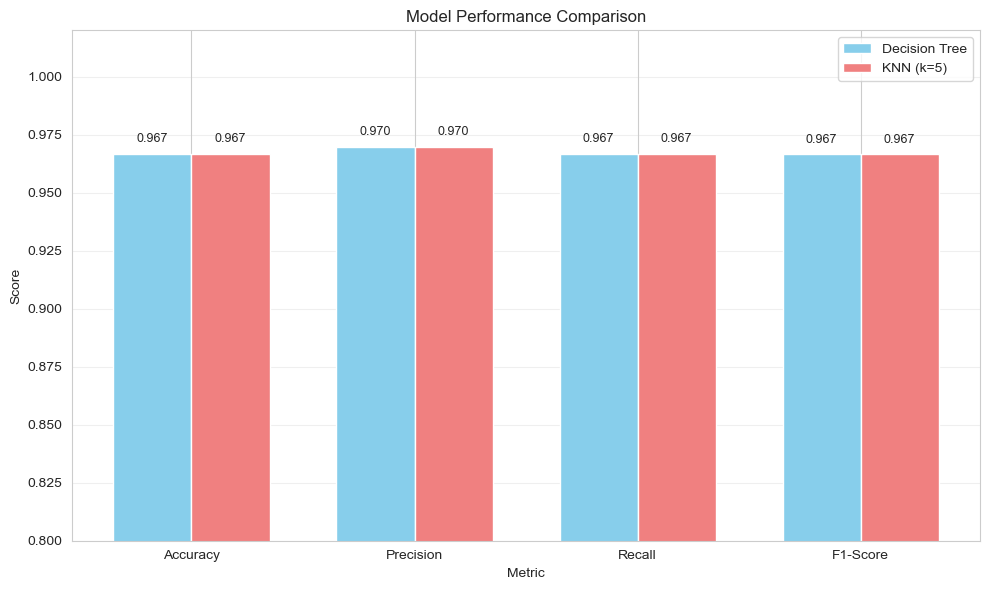


🎉 Classification completed! Images saved.


In [8]:
# ==================== 4. COMPARISON ====================
print("\n📊 Model Comparison:")
results = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN (k=5)'],
    'Accuracy': [acc_dt, acc_knn],
    'Precision': [prec_dt, prec_knn],
    'Recall': [rec_dt, rec_knn],
    'F1-Score': [f1_dt, f1_knn]
})
print(results.to_string(index=False))

# Determine best model
best_model = "Decision Tree" if f1_dt >= f1_knn else "KNN"
print(f"\n🏆 Best Model: {best_model} (based on F1-score)")

# Save comparison plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, [acc_dt, prec_dt, rec_dt, f1_dt], width, label='Decision Tree', color='skyblue')
plt.bar(x + width/2, [acc_knn, prec_knn, rec_knn, f1_knn], width, label='KNN (k=5)', color='lightcoral')

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0.8, 1.02)
plt.legend()
plt.grid(True, axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate([acc_dt, prec_dt, rec_dt, f1_dt]):
    plt.text(i - width/2, v + 0.005, f"{v:.3f}", ha='center', fontsize=9)
for i, v in enumerate([acc_knn, prec_knn, rec_knn, f1_knn]):
    plt.text(i + width/2, v + 0.005, f"{v:.3f}", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("model_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

print("\n🎉 Classification completed! Images saved.")

We can't tell which model is better based on the outputs above because both are achieving the same Accuracy, Precision, Recall, and F1-Score.

Let's use other approaches to break the tie

#### Cross-Validation Stability

In [10]:
from sklearn.model_selection import cross_val_score

# Cross-validation (5-fold)
cv_dt = cross_val_score(dt, X_scaled, y, cv=5, scoring='accuracy')
cv_knn = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_scaled, y, cv=5, scoring='accuracy')

print(f"Decision Tree CV Accuracy: {cv_dt.mean():.3f} ± {cv_dt.std():.3f}")
print(f"KNN (k=5) CV Accuracy: {cv_knn.mean():.3f} ± {cv_knn.std():.3f}")

Decision Tree CV Accuracy: 0.973 ± 0.025
KNN (k=5) CV Accuracy: 0.960 ± 0.033


#### Sensitivity to Noise

In [12]:
# Add small noise to test set only (simulate measurement error)
X_test_noisy = X_test + np.random.normal(0, 0.05, X_test.shape)  # Small Gaussian noise

# Re-predict
y_pred_dt_noisy = dt.predict(X_test_noisy)
y_pred_knn_noisy = knn.predict(X_test_noisy)

acc_dt_noisy = accuracy_score(y_test, y_pred_dt_noisy)
acc_knn_noisy = accuracy_score(y_test, y_pred_knn_noisy)

print(f"After noise:")
print(f"  Decision Tree: {acc_dt_noisy:.3f}")
print(f"  KNN (k=5):     {acc_knn_noisy:.3f}")

After noise:
  Decision Tree: 0.933
  KNN (k=5):     0.900


#### Prediction Confidence

In [14]:
# Get prediction probabilities
dt_probs = dt.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)

# Average confidence (max probability per prediction)
dt_conf = dt_probs.max(axis=1).mean()
knn_conf = knn_probs.max(axis=1).mean()

print(f"Average prediction confidence:")
print(f"  Decision Tree: {dt_conf:.3f}")
print(f"  KNN:           {knn_conf:.3f}")

Average prediction confidence:
  Decision Tree: 0.981
  KNN:           0.953


#### Decision Boundary Visualization

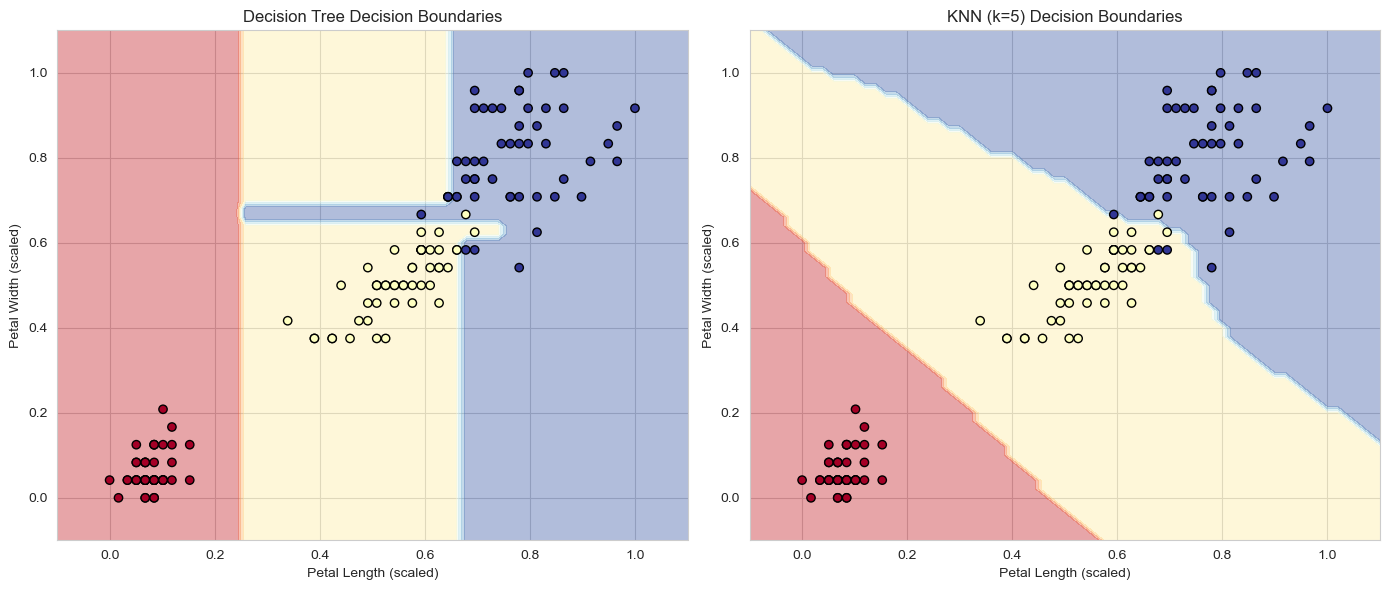

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Use two features for 2D plot
X_2d = X_scaled[:, 2:4]  # petal length & width
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

# Train on 2D
dt_2d = DecisionTreeClassifier(random_state=42).fit(X_train_2d, y_train_2d)
knn_2d = KNeighborsClassifier(n_neighbors=5).fit(X_train_2d, y_train_2d)

# Create mesh
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 0.1, X_2d[:, 0].max() + 0.1
y_min, y_max = X_2d[:, 1].min() - 0.1, X_2d[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on mesh
Z_dt = dt_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape
Z_dt = Z_dt.reshape(xx.shape)
Z_knn = Z_knn.reshape(xx.shape)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Decision Tree
ax1.contourf(xx, yy, Z_dt, alpha=0.4, cmap='RdYlBu')
scatter = ax1.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='RdYlBu', edgecolors='k')
ax1.set_title("Decision Tree Decision Boundaries")
ax1.set_xlabel("Petal Length (scaled)")
ax1.set_ylabel("Petal Width (scaled)")

# KNN
ax2.contourf(xx, yy, Z_knn, alpha=0.4, cmap='RdYlBu')
ax2.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='RdYlBu', edgecolors='k')
ax2.set_title("KNN (k=5) Decision Boundaries")
ax2.set_xlabel("Petal Length (scaled)")
ax2.set_ylabel("Petal Width (scaled)")

plt.tight_layout()
plt.savefig("decision_boundaries.png", dpi=300, bbox_inches='tight')
plt.show()

## Association Rule Mining

In [18]:
# ==============================
# Part B: Association Rule Mining
# ==============================

import random
import pandas as pd
import logging
from mlxtend.frequent_patterns import apriori, association_rules

# -------------------------------
# Logging Configuration
# -------------------------------
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

logging.info("Starting Association Rule Mining task")

# -------------------------------
# 1. Generate Synthetic Data
# -------------------------------
logging.info("Generating synthetic transactional data")

items_pool = [
    'milk', 'bread', 'butter', 'cheese', 'yogurt',
    'apples', 'bananas', 'grapes', 'oranges', 'pears',
    'chicken', 'beef', 'pork', 'fish', 'shrimp',
    'rice', 'pasta', 'tomatoes', 'onions', 'potatoes'
]

patterns = [
    ['milk', 'bread', 'butter'],       # Breakfast items
    ['beer', 'diapers'],               # Classic association example
    ['rice', 'chicken'],               # Common dinner combo
    ['apples', 'bananas', 'oranges'],  # Fruit lovers
]
random.seed(42)
transactions = []
for _ in range(30):
    basket_size = random.randint(3, 8)
    basket = random.sample(items_pool, basket_size)

    if random.random() < 0.5:
        pattern = random.choice(patterns)
        basket = list(set(basket + pattern))

    transactions.append(basket)

logging.info(f"Generated {len(transactions)} transactions")

# One-hot encode
all_items = sorted(list(set(i for basket in transactions for i in basket)))
df_transactions = pd.DataFrame(0, index=range(len(transactions)), columns=all_items)

for idx, basket in enumerate(transactions):
    for item in basket:
        df_transactions.loc[idx, item] = 1

logging.info("Data transformed to one-hot encoded format")

2025-08-14 22:10:43,049 - INFO - Starting Association Rule Mining task
2025-08-14 22:10:43,049 - INFO - Generating synthetic transactional data
2025-08-14 22:10:43,051 - INFO - Generated 30 transactions
2025-08-14 22:10:43,063 - INFO - Data transformed to one-hot encoded format


### Apriori Algorithm

In [20]:
# -------------------------------
# 2. Apply Apriori Algorithm
# -------------------------------
import warnings
warnings.filterwarnings("ignore")
logging.info("Running Apriori algorithm with min_support=0.2")

frequent_itemsets = apriori(df_transactions, min_support=0.2, use_colnames=True)
logging.info(f"Found {len(frequent_itemsets)} frequent itemsets")

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
logging.info(f"Generated {len(rules)} association rules")

# Sort and display
top_rules = rules.sort_values(by="lift", ascending=False).head(5)
logging.info("Top 5 rules (sorted by lift):")
logging.info("\n" + str(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]))

2025-08-14 22:10:43,094 - INFO - Running Apriori algorithm with min_support=0.2
2025-08-14 22:10:43,101 - INFO - Found 32 frequent itemsets
2025-08-14 22:10:43,108 - INFO - Generated 21 association rules
2025-08-14 22:10:43,111 - INFO - Top 5 rules (sorted by lift):
2025-08-14 22:10:43,118 - INFO - 
   antecedents consequents  support  confidence    lift
11    (cheese)  (potatoes)      0.2    0.750000  2.8125
12  (potatoes)    (cheese)      0.2    0.750000  2.8125
14      (rice)   (chicken)      0.2    0.600000  2.0000
13   (chicken)      (rice)      0.2    0.666667  2.0000
6       (milk)     (bread)      0.2    0.600000  1.8000


### Analysis of One Rule

In [22]:
# -------------------------------
# 3. Analysis of One Rule
# -------------------------------
if not top_rules.empty:
    first_rule = top_rules.iloc[0]
    antecedents = ', '.join(list(first_rule['antecedents']))
    consequents = ', '.join(list(first_rule['consequents']))

    logging.info(f"💡 Analysis: Customers who buy [{antecedents}] often also buy [{consequents}].")
    logging.info("Implication: Place these items together in-store or bundle them in promotions to boost cross-selling.")

logging.info("Association Rule Mining task completed successfully")

2025-08-14 22:10:43,154 - INFO - 💡 Analysis: Customers who buy [cheese] often also buy [potatoes].
2025-08-14 22:10:43,155 - INFO - Implication: Place these items together in-store or bundle them in promotions to boost cross-selling.
2025-08-14 22:10:43,156 - INFO - Association Rule Mining task completed successfully
